In [33]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

from currency import CURRENCY

In [2]:
bitcoin = CURRENCY("bitcoin")

In [3]:
data = bitcoin.get_historical_data()

[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2019-07-14 17:00:00+01:00,10425.389648,10608.419922,10362.700195,10584.940430,10584.940430,0
1,2019-07-14 18:00:00+01:00,10585.629883,10672.599609,10533.599609,10578.059570,10578.059570,31013664
2,2019-07-14 19:00:00+01:00,10575.870117,10598.110352,10332.059570,10477.519531,10477.519531,45851072
3,2019-07-14 20:00:00+01:00,10482.740234,10540.070312,10413.049805,10495.320312,10495.320312,24339392
4,2019-07-14 21:00:00+01:00,10493.009766,10715.629883,10382.269531,10648.830078,10648.830078,46542592
...,...,...,...,...,...,...,...
14559,2021-03-14 14:00:00+00:00,59982.449219,60400.109375,59982.449219,59993.128906,59993.128906,591134720
14560,2021-03-14 15:00:00+00:00,60031.273438,60066.769531,59627.542969,59629.246094,59629.246094,1254211584
14561,2021-03-14 16:00:00+00:00,59713.652344,59994.089844,59440.003906,59535.781250,59535.781250,837287936
14562,2021-03-14 17:00:00+00:00,59616.347656,59974.750000,59598.496094,59873.128906,59873.128906,533155840


In [5]:
    data["day_name"] = data["Datetime"].apply(lambda d: d.day_name())
    data["date_as_str"] = data["Datetime"].apply(lambda d: str(d.date()))

In [24]:
data_date_aggregated = data[["date_as_str","Open","Close","High","Low","Volume"]]
data_date_aggregated = data_date_aggregated.groupby("date_as_str").agg(["mean","std"])

In [28]:
data_date_aggregated

Open                      Close               \
                     mean          std          mean          std   
date_as_str                                                         
2019-07-14   10552.064174    87.221280  10563.362723    75.632033   
2019-07-15   10384.716309   264.187034  10403.784546   284.370187   
2019-07-16   10458.648804   478.589460  10400.060262   504.891754   
2019-07-17    9560.863322   177.069529   9571.025024   179.151835   
2019-07-18    9988.737874   393.414213  10026.316732   409.903750   
...                   ...          ...           ...          ...   
2021-03-10   55380.769694  1207.406855  55413.021973  1185.977544   
2021-03-11   56282.195964   908.426029  56339.128581   952.571343   
2021-03-12   56919.281087   461.331386  56887.526204   422.254047   
2021-03-13   58754.476888  1761.524725  58904.504069  1797.384876   
2021-03-14   60607.933799   563.356849  60518.277961   591.929024   

                     High                        Low               \
                     mean          std          mean          std   
date_as_str                                                         
2019-07-14   10643.124302    62.950892  10439.132673    89.584348   
2019-07-15   10488.091634   272.924249  10288.249959   275.765458   
2019-07-16   10522.331665   481.786709  10322.670776   520.538012   
2019-07-17    9658.869059   183.771173   9477.086182   187.401044   
2019-07-18   10112.402547   403.412957   9912.180990   419.388114   
...                   ...          ...           ...          ...   
2021-03-10   55685.500326  1190.928971  55070.093913  1147.544560   
2021-03-11   56577.541667   905.028053  56018.924967   949.978352   
2021-03-12   57161.648275   433.927847  56611.609212   495.999042   
2021-03-13   59073.304199  1814.541904  58544.726725  1789.777935   
2021-03-14   60752.059622   541.763084  60353.247122   561.736101   

                   Volume                
                     mean           std  
date_as_str                              
2019-07-14   2.782463e+07  1.587689e+07  
2019-07-15   3.795535e+07  2.772905e+07  
2019-07-16   4.648044e+07  4.840765e+07  
2019-07-17   3.904153e+07  1.926262e+07  
2019-07-18   4.131623e+07  4.524168e+07  
...                   ...           ...  
2021-03-10   4.481693e+08  4.767530e+08  
2021-03-11   3.145108e+08  5.163656e+08  
2021-03-12   1.982370e+08  4.318260e+08  
2021-03-13   5.420701e+08  1.272255e+09  
2021-03-14   2.688744e+08  3.900054e+08  

[610 rows x 10 columns]

In [26]:
data_date_aggregated = data_date_aggregated.dropna()

False


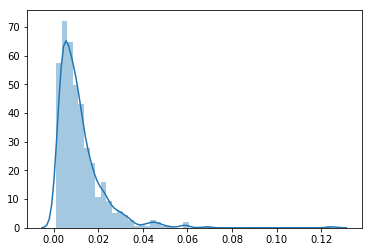

False


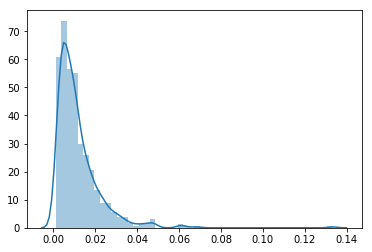

False


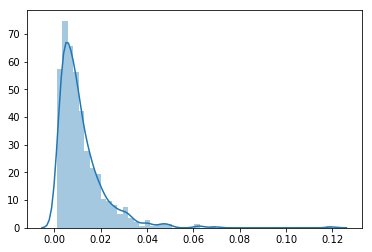

False


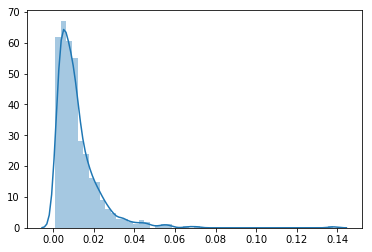

True


ValueError: cannot convert float NaN to integer

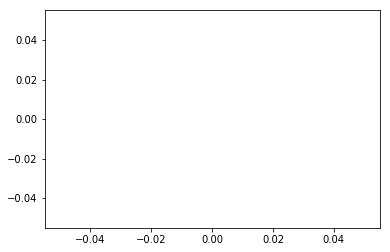

In [34]:
for col in ["Open","Close","High","Low","Volume"] : 
    print((data_date_aggregated[(col,"std")] / data_date_aggregated[(col,"mean")]).isnull().any())
    sns.distplot(data_date_aggregated[(col,"std")] / data_date_aggregated[(col,"mean")])
    plt.show()

In [19]:
data_date_aggregated.columns

MultiIndex([(  'Open', 'mean'),
            (  'Open',  'std'),
            ( 'Close', 'mean'),
            ( 'Close',  'std'),
            (  'High', 'mean'),
            (  'High',  'std'),
            (   'Low', 'mean'),
            (   'Low',  'std'),
            ('Volume', 'mean'),
            ('Volume',  'std')],
           )

In [16]:
data_date_aggregated["Open","Close"]

KeyError: ('Open', 'Close')

ValueError: color kwarg must have one color per data set. 2 data sets and 1 colors were provided

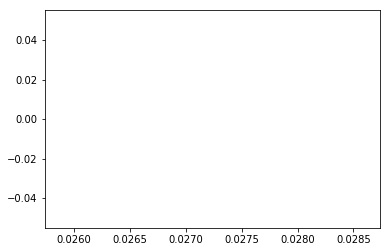

In [35]:
sns.distplot((data_date_aggregated.Close - data_date_aggregated.Open).abs() / data_date_aggregated.Open)

,mean,std
date_as_str,,
2019-07-14,0.001071,0.132872
2019-07-15,0.001836,0.076397
2019-07-16,0.005602,0.054958
2019-07-17,0.001063,0.011760
2019-07-18,0.003762,0.041914
...,...,...
2021-03-10,0.000582,0.017748
2021-03-11,0.001012,0.048595
2021-03-12,0.000558,0.084706
